In [10]:
# import packages
!pip3 install torch
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
import torchvision.models as models
# This is for the progress bar.
from tqdm import tqdm
import seaborn as sns
# if you don't have d2l, you can use the following code to install it.
!pip install d2l==0.17.5
# d2l is a package used to dynamically display the loss drop
from d2l import torch as d2l


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 kB 1.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 55.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 52.4 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 74.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: idna
    Found existing installation: idna 3.3
    Uninstalling idna-3.3:
      Successfully uninstalled idna-3.3
  Attempting uninstall: chardet
    Found existing installation: chardet 5.0.0
    Uninstalling chardet-5.0.0:
  

We should process the data at first.

In [12]:
# Read from the csv file and take a look at the data labels.
labels_dataframe = pd.read_csv('./leaves data/train.csv')
labels_dataframe.head(5)

,image,label
0,images/0.jpg,maclura_pomifera
1,images/1.jpg,maclura_pomifera
2,images/2.jpg,maclura_pomifera
3,images/3.jpg,maclura_pomifera
4,images/4.jpg,maclura_pomifera


In [13]:
labels_dataframe.describe()

,image,label
count,18353,18353
unique,18353,176
top,images/0.jpg,maclura_pomifera
freq,1,353


Take a look at the distribution of the labels.

In [14]:
# Sort the label by the number of samples from high to low.
leaves_labels = sorted(list(set(labels_dataframe['label'])))
n_classes = len(leaves_labels)
print(n_classes)
leaves_labels[:10]

176


['abies_concolor',
 'abies_nordmanniana',
 'acer_campestre',
 'acer_ginnala',
 'acer_griseum',
 'acer_negundo',
 'acer_palmatum',
 'acer_pensylvanicum',
 'acer_platanoides',
 'acer_pseudoplatanus']

Assign different numbers to different labels

In [15]:
# Create a dictionary to map the label to the index.
class_to_num = dict(zip(leaves_labels, range(n_classes)))
class_to_num

{'abies_concolor': 0,
 'abies_nordmanniana': 1,
 'acer_campestre': 2,
 'acer_ginnala': 3,
 'acer_griseum': 4,
 'acer_negundo': 5,
 'acer_palmatum': 6,
 'acer_pensylvanicum': 7,
 'acer_platanoides': 8,
 'acer_pseudoplatanus': 9,
 'acer_rubrum': 10,
 'acer_saccharinum': 11,
 'acer_saccharum': 12,
 'aesculus_flava': 13,
 'aesculus_glabra': 14,
 'aesculus_hippocastamon': 15,
 'aesculus_pavi': 16,
 'ailanthus_altissima': 17,
 'albizia_julibrissin': 18,
 'amelanchier_arborea': 19,
 'amelanchier_canadensis': 20,
 'amelanchier_laevis': 21,
 'asimina_triloba': 22,
 'betula_alleghaniensis': 23,
 'betula_jacqemontii': 24,
 'betula_lenta': 25,
 'betula_nigra': 26,
 'betula_populifolia': 27,
 'broussonettia_papyrifera': 28,
 'carpinus_betulus': 29,
 'carpinus_caroliniana': 30,
 'carya_cordiformis': 31,
 'carya_glabra': 32,
 'carya_ovata': 33,
 'carya_tomentosa': 34,
 'castanea_dentata': 35,
 'catalpa_bignonioides': 36,
 'catalpa_speciosa': 37,
 'cedrus_atlantica': 38,
 'cedrus_deodara': 39,
 'cedru

At last we need to transform the index into the labels.

In [16]:
num_to_class = {v : k for k, v in class_to_num.items()}

See the size of top 20 photos

In [17]:
data_file_path = './leaves data/train/'

transform = transforms.Compose([
    transforms.ToTensor(),
])

# see the size of top 20 images
for i in range(20):
    img = Image.open(data_file_path+labels_dataframe['image'][i])
    print(transform(img).shape)

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


Since we want to use the pretrained ResNet model, so we do not need to resize the images.

Create a dataset for the training, validation and test.

In [18]:
class TrainData(Dataset):
    def __init__(self, csv_path, file_path):
        """
        Args:
            csv_path (string): csv file path.
            img_path (string): image file path.
        """

        self.file_path = file_path

        # read the csv file
        self.data_info = pd.read_csv(csv_path, header=None)  
        
        # caculate the length so that we can split the data into train and valid
        self.data_len = len(self.data_info.index) - 1
        
        # From above we can see the first column is the name of image
        self.image = np.asarray(self.data_info.iloc[1:, 0])
        # The second column is the label
        self.label = np.asarray(self.data_info.iloc[1:, 1])

        self.dataset_len = len(self.image)

    def __getitem__(self, index):
        # Get the image depending on the index in csv file
        image_name = self.image[index]
        img = Image.open(self.file_path + image_name)

        transform = transforms.Compose([
            transforms.ToTensor()
        ])
        
        img = transform(img)
        
        label = self.label[index]
        # number label
        number_label = class_to_num[label]

        return img, number_label 

    def __len__(self):
        return self.dataset_len


Create training dataset.

In [19]:
train_path = './leaves data/train.csv'
img_path = './leaves data'

train_dataset = TrainData(train_path, img_path)

Create validation dataset.

In [20]:
valid_len = int(len(train_dataset) * 0.2)
train_len = len(train_dataset) - valid_len
train_dataset, valid_dataset = torch.utils.data.dataset.random_split(train_dataset, [train_len, valid_len])

os.chdir('/kaggle/working')
!lsCreate the data loader for the training and testing dataset.

In [21]:
train_loader = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=8, 
        shuffle=False,
        num_workers=5
    )
valid_loader = torch.utils.data.DataLoader(
        dataset=valid_dataset,
        batch_size=8,
        shuffle=False,
        num_workers=5
    )

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Show the images and labels in the training dataset.

In [22]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5): 
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

In [23]:
def get_leaves_labels(labels):  
    text_labels = [leaves_labels[int(i)] for i in labels]
    return text_labels

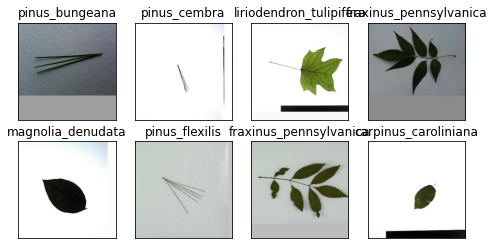

In [24]:
batch = iter(train_loader).next()
imgs = (batch[0][0:8].permute(0, 2, 3, 1))
show_images(imgs, 2, 4, titles= get_leaves_labels(batch[1]), scale=2);

See which GPU we can use.

In [25]:
def get_device():
    return 'cuda' if torch.cuda.is_available() else 'cpu'

device = get_device()
print(device)

cuda


In [ ]:
!nvidia-smi

Use the pretrained ResNet model. Since we only need to predict 176 labels, we replece the last layer with a new layer.

In [27]:
def res_model(num_classes):
    model_ft = models.resnet34()
    num_ftrs = model_ft.fc.in_features
    model_ft.fc = nn.Sequential(nn.Linear(num_ftrs, num_classes))

    return model_ft

In [28]:
# hyperparameters which will not change
wd = 1e-3
num_epochs = 80
model_path = './res_model.ckpt'

In [29]:
# Initialize a model, and put it on the device specified.
model = res_model(176)
model = model.to(device)
model.device = device
# For the classification task, we use cross-entropy as the measurement of performance.
criterion = nn.CrossEntropyLoss()

best_acc = 0.0

Create the test dataset.

In [ ]:
test_path = './leaves data/test.csv'
img_path = './leaves data'

test_dataset = TrainData(test_path, img_path)

In [ ]:
test_loader = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=8,
        shuffle=False,
        num_workers=5
    )

In [ ]:
model = res_model(176)

# create model and load weights from checkpoint
model = model.to(device)
model.load_state_dict(torch.load(model_path))

# Make sure the model is in eval mode.
# Some modules like Dropout or BatchNorm affect if the model is in training mode.
model.eval()

# Initialize a list to store the predictions.
predictions = []
# Iterate the testing set by batches.
for batch in tqdm(test_loader):
    
    imgs = batch
    with torch.no_grad():
        logits = model(imgs.to(device))
    
    # Take the class with greatest logit as prediction and record it.
    predictions.extend(logits.argmax(dim=-1).cpu().numpy().tolist())

preds = []
for i in predictions:
    preds.append(num_to_class[i])

test_data = pd.read_csv(test_path)
test_data['label'] = pd.Series(preds)